In [ ]:
### Header: introduce dataset and goals

![Image](../../resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Population Coding</h1> 
<h2 align="center"> Day 2, Afternoon Session</h2> 



<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
In the first workshop of today, we examined how sensory variables can be encoded in individual neurons' activity. We now turn our attention to the coordinated activity of groups of neurons: population codes!
    
### How do populations of neurons encode information about task-relevant sensory information? 
### How are these population codes modulated by task context or behavioral state? 
### What other types of thing are encoded in population activity?

<div style="background: #E6E6FA; border-radius: 3px; padding: 10px;">
<p>

### Data access - loading an experiment of interest

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brain_observatory_utilities.datasets.behavior.data_formatting as behavior_utils

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache



/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2024/"

In [ ]:
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(cache_dir=data_root, use_static_cache=True)

# get the metadata tables
units_table = cache.get_unit_table()

channels_table = cache.get_channel_table()

probes_table = cache.get_probe_table()

behavior_sessions_table = cache.get_behavior_session_table()

ecephys_sessions_table = cache.get_ecephys_session_table()

<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### Grab data from a session

In [5]:
session = cache.get_ecephys_session(
           ecephys_session_id=1065437523)

/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
The stimulus presentations table is a record of every stimulus we presented to the mouse over the course of this experiment. Let's take a look at this table. 
    
Here, we'll use an annotated version that includes some extra behavioral information.

In [49]:
stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,time_from_last_change,pre_change,licked,lick_on_next_flash,pre_omitted,post_omitted,reward_rate,engaged,engagement_state,epoch
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,NaN,False,True,True,False,<NA>,inf,True,engaged,0
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,NaN,False,True,False,False,False,inf,True,engaged,0
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,NaN,False,False,False,False,False,inf,True,engaged,0
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,NaN,False,False,False,False,False,inf,True,engaged,0
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,NaN,False,False,False,False,False,inf,True,engaged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,0,im047_r,0.250196,3621.718645,3621.968840,215491,215506,False,False,False,...,13.511377,False,False,False,False,False,0.713686,False,disengaged,5
4788,0,im047_r,0.250222,3622.469259,3622.719481,215536,215551,False,False,False,...,14.261992,False,False,False,False,False,0.713686,False,disengaged,5
4789,0,im047_r,0.250198,3623.219923,3623.470122,215581,215596,False,False,False,...,15.012656,False,False,False,False,False,0.713686,False,disengaged,5


### It contains a great deal of information about the stimulus presentations! Let's look at all the columns:

In [7]:
np.sort(stimulus_presentations.columns)

array(['aborted', 'active', 'auto_rewarded', 'catch', 'change_time',
       'color', 'contrast', 'correct_reject', 'duration', 'end_frame',
       'end_time', 'engaged', 'engagement_state', 'epoch', 'false_alarm',
       'flashes_since_change', 'go', 'hit', 'image_name', 'is_change',
       'is_image_novel', 'is_sham_change', 'lick_on_next_flash', 'licked',
       'licks', 'mean_pupil_width', 'mean_running_speed', 'miss',
       'omitted', 'orientation', 'position_x', 'position_y',
       'post_omitted', 'pre_change', 'pre_omitted', 'response_time',
       'reward_rate', 'reward_time', 'reward_volume', 'rewarded',
       'spatial_frequency', 'start_frame', 'start_time', 'stimulus_block',
       'stimulus_index', 'stimulus_name', 'temporal_frequency',
       'time_from_last_change', 'trials_id'], dtype=object)

The experiment is divided into stimulus blocks. During each block a different set of stimuli are presented. A stimulus block can be active or passive. In active blocks, the mouse performs the change detection task introduced earlier. In passive blocks, there is no task.

The different types of stimuli are indexed by the 'stimulus_block' column. Notice that our annotated stimulus table only has block 0, in which natural images are shown. What are the other stimulus blocks?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
What stimuli were shown in stimulus block 0? (Remember: our "stimulus_presentations" table already contains only this block.)

In [8]:
stimulus_presentations['image_name'].unique()

array(['im036_r', 'im078_r', 'omitted', 'im111_r', 'im047_r', 'im083_r',
       'im012_r', 'im115_r', 'im044_r'], dtype=object)

<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">    

What are all the types of stimulus block that were presented in this session?

In [9]:
all_stimulus_presentations = session.stimulus_presentations
all_stimulus_presentations.groupby('stimulus_block')[['stimulus_block', 
                                                'stimulus_name', 
                                                'active', 
                                                'duration', 
                                                'start_time']].head()

,stimulus_block,stimulus_name,active,duration,start_time
stimulus_presentations_id,,,,,
0,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.131464
1,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.882028
2,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250232,29.632680
3,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250186,30.383329
4,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250229,31.133886
4797,1,spontaneous,False,10.008420,3648.207579
4798,2,gabor_20_deg_250ms,False,0.250208,3658.215999
4799,2,gabor_20_deg_250ms,False,0.250208,3658.466207
4800,2,gabor_20_deg_250ms,False,0.250208,3658.716415


In [10]:
all_stimulus_presentations['stimulus_name'].unique()

array(['Natural_Images_Lum_Matched_set_ophys_G_2019', 'spontaneous',
       'gabor_20_deg_250ms', 'flash_250ms'], dtype=object)

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
What stimuli were shown in stimulus block 0? (Remember: our "stimulus_presentations" table already contains only this block.)

In [12]:
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,time_from_last_change,pre_change,licked,lick_on_next_flash,pre_omitted,post_omitted,reward_rate,engaged,engagement_state,epoch
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,NaN,False,True,True,False,<NA>,inf,True,engaged,0
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,NaN,False,True,False,False,False,inf,True,engaged,0
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,NaN,False,False,False,False,False,inf,True,engaged,0
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,NaN,False,False,False,False,False,inf,True,engaged,0
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,NaN,False,False,False,False,False,inf,True,engaged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,0,im047_r,0.250196,3621.718645,3621.968840,215491,215506,False,False,False,...,13.511377,False,False,False,False,False,0.713686,False,disengaged,5
4788,0,im047_r,0.250222,3622.469259,3622.719481,215536,215551,False,False,False,...,14.261992,False,False,False,False,False,0.713686,False,disengaged,5
4789,0,im047_r,0.250198,3623.219923,3623.470122,215581,215596,False,False,False,...,15.012656,False,False,False,False,False,0.713686,False,disengaged,5


In [13]:
np.sort(stimulus_presentations['image_name'].unique())

array(['im012_r', 'im036_r', 'im044_r', 'im047_r', 'im078_r', 'im083_r',
       'im111_r', 'im115_r', 'omitted'], dtype=object)

### Moving forwards, we will only look at this stimulus block, 0, where the mouse is performing the change detection task.

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
How many stimulus presentations are there and how many image changes (in block 0)?

In [15]:
num_presentations = len(stimulus_presentations)
num_changes = np.sum(stimulus_presentations['is_change'].values)

print('{} stimulus presentations'.format(num_presentations))
print('{} image changes'.format(num_changes))

4797 stimulus presentations
275 image changes


### The (annotated) stimulus presentation table also includes information about the mouse behavior.

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
How well does the mouse do the task? What are its hit and miss rates? 
    
(Note that the first few trials are auto-rewarded, and should not be counted.)

In [16]:
change_stimulus_presentations = stimulus_presentations[stimulus_presentations['is_change']]
num_change_trials = num_changes - np.sum(change_stimulus_presentations['auto_rewarded'])

print('Hit rate: {}'.format(np.sum(change_stimulus_presentations['hit']) / num_change_trials ))
print('Miss rate: {}'.format(np.sum(change_stimulus_presentations['miss']) / num_change_trials ))

Hit rate: 0.7977941176470589
Miss rate: 0.20220588235294118


<div style="background: #E6E6FA; border-radius: 3px; padding: 10px;">
    
### Now let's get unit and channel data, sort the units by depth and filter for "good" units.

In [17]:
### get unit and channel data, sort the units by depth and filter for "good" units
units = session.get_units() # contains information about spike waveforms, isolation quality
channels = session.get_channels() # contains information about anatomical location

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

#first let's sort our units by depth and filter
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    Which brain structures were recorded from in this session? How many units are present in each structure? (Hint: try the "value_counts" function.)

In [18]:
unit_channels.value_counts('structure_acronym')

structure_acronym
SGN      260
CA1      228
DG       167
VISpm    165
APN      151
TH       146
VISam    144
VISp     131
VISl     127
VISal    125
MRN      106
VISrl     99
ProS      98
PP        94
PIL       74
PoT       70
CA3       67
SUB       52
LP        24
MGm       21
NOT       18
RN        17
MB        15
POST       2
LT         2
MGv        1
dtype: int64

<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Let's look at the population activity in primary visual cortex

In [19]:
area_of_interest = 'VISp'
area_units = good_units[good_units['structure_acronym'] == area_of_interest]
num_units = len(area_units)

### Let's start by looking at the neural activity! Does it reflect the image presentation?

### The session.spike_times object contains all spike times, in seconds, indexed by the unit ID. Let's take a look at this object.

In [21]:
spike_times = session.spike_times
print(type(spike_times))
spike_times

<class 'dict'>


{1068230174: array([9.44254618e+00, 2.33621481e+01, 2.34528150e+01, ...,
        9.50809482e+03, 9.51961755e+03, 9.52079809e+03]),
 1068230173: array([6.85353963e+00, 1.12225507e+01, 1.51770274e+01, ...,
        9.53846293e+03, 9.53847370e+03, 9.53979757e+03]),
 1068229957: array([4138.03009707, 4542.21778688, 4542.4386541 , ..., 9539.18743594,
        9539.33773632, 9539.83660425]),
 1068229949: array([4.66810076e+00, 4.71560088e+00, 4.72050090e+00, ...,
        9.53462899e+03, 9.53743216e+03, 9.53826630e+03]),
 1068229887: array([4.69210083e+00, 5.04563505e+00, 5.26246894e+00, ...,
        9.53967004e+03, 9.53979680e+03, 9.53983434e+03]),
 1068229886: array([4.70133418e+00, 5.09830185e+00, 5.35013582e+00, ...,
        9.53971987e+03, 9.53974080e+03, 9.53978037e+03]),
 1068229911: array([4.97070153e+00, 5.39926928e+00, 5.45693609e+00, ...,
        9.53975597e+03, 9.53984134e+03, 9.53989457e+03]),
 1068230009: array([5.59440311e+00, 7.24834063e+00, 1.64365972e+01, ...,
        9.539629

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

Get the array of spike times for unit 1068230173. How many times does this unit spike in the first minute of the experiment?

In [22]:
unit_spike_times = spike_times[1068230173]
unit_spike_times

array([6.85353963e+00, 1.12225507e+01, 1.51770274e+01, ...,
       9.53846293e+03, 9.53847370e+03, 9.53979757e+03])

In [23]:
sum(unit_spike_times < 60)

33

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

Plot a population spike raster spanning 1 second before to 1 second after a stimulus presentation. Fill in the code in the for 

(0.0, 72.0)

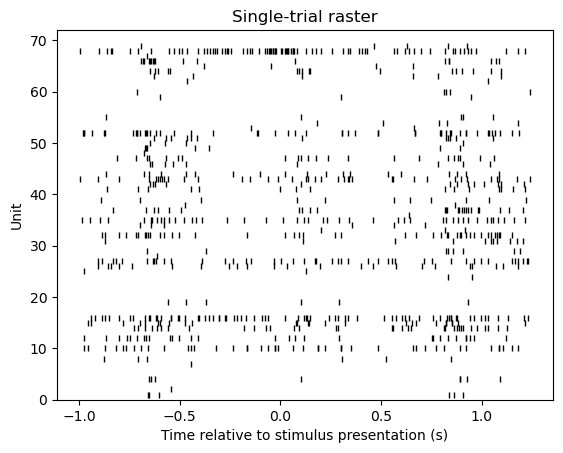

In [24]:
### plot a single-trial raster, population PSTH, and representation matrix
pre_time = 1
post_time = 1

fig, ax = plt.subplots(1, 1)

presentation_idx = 1
start_time = stimulus_presentations['start_time'][presentation_idx] # in seconds - start one second before this
end_time = stimulus_presentations['end_time'][presentation_idx] # in seconds - go to one second after this

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time - pre_time) * (unit_spike_times < end_time + post_time)]
    unit_num_spikes = len(unit_spike_times)
    
    ax.plot(unit_spike_times - start_time, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

ax.set_title('Single-trial raster')
ax.set_xlabel('Time relative to stimulus presentation (s)')
ax.set_ylabel('Unit')
ax.set_ylim((0, num_units+1))

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
Now let's compare to a change trial.

(0.0, 71.0)

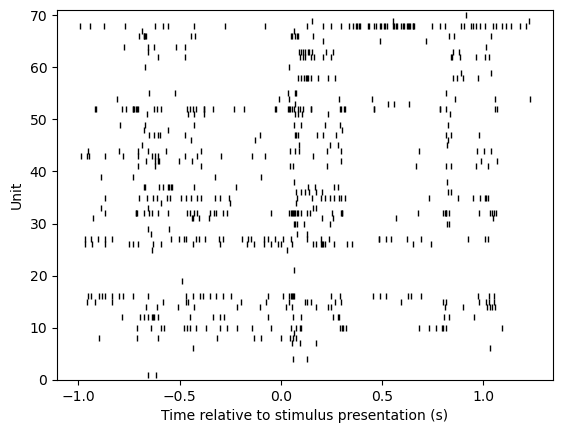

In [25]:
### plot a single-trial raster, population PSTH, and representation matrix
fig, ax = plt.subplots(1, 1)

change_idx = np.where(stimulus_presentations['is_change'].values)[0]
presentation_idx = change_idx[0]

start_time = stimulus_presentations['start_time'][presentation_idx]
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time - pre_time) * (unit_spike_times < end_time + post_time)]
    unit_num_spikes = len(unit_spike_times)
    
    ax.plot(unit_spike_times - start_time, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

ax.set_xlabel('Time relative to stimulus presentation (s)')
ax.set_ylabel('Unit')
ax.set_ylim((0, num_units))

### Now let's take a look at the trial-averaged responses to see how a neuron encodes the stimulus in its time-dependent firing rate (its peri-stimulus time histogram, or PSTH).

In [26]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

Let's start by plotting the response of unit 0 to one of the images.

In [27]:
stimuli = stimulus_presentations['image_name'].unique()
stimulus = stimuli[0]

In [28]:
print(stimuli)

['im036_r' 'im078_r' 'omitted' 'im111_r' 'im047_r' 'im083_r' 'im012_r'
 'im115_r' 'im044_r']


In [34]:
presentations = stimulus_presentations[stimulus_presentations['image_name'] == stimulus]
num_presentations = len(presentations)

start_times = presentations['start_time'].values

In [30]:
unit_ids = area_units.index
iu = unit_ids[0]
unit_spike_times = spike_times[iu]

Text(0.5, 1.0, 'PSTH for im036_r')

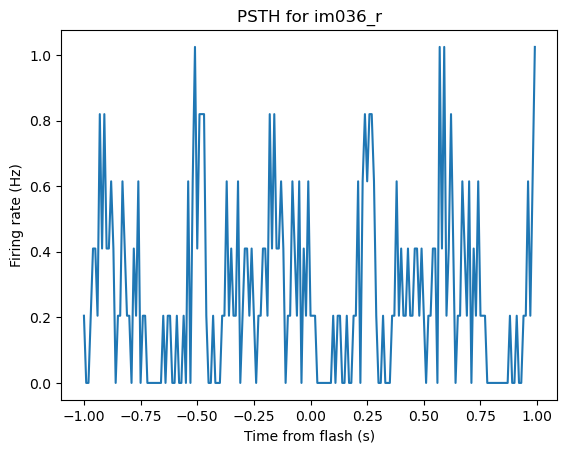

In [31]:
time_before_im = 1
duration = 2

unit_response, bins = makePSTH(unit_spike_times, 
                                  start_times - time_before_im, 
                                  duration, binSize=0.01)

fig, ax = plt.subplots(1, 1)
ax.plot(bins[:-1] - time_before_im, unit_response)
ax.set_xlabel('Time from flash (s)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('PSTH for {}'.format(stimulus))

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
Plot the PSTHs for every unit to that image.

Text(0.5, 1.0, 'PSTH for im036_r')

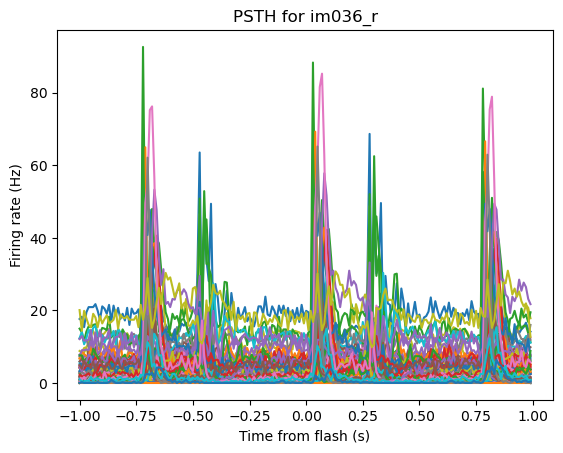

In [32]:
### Plot a set of PSTHs

psths = []
fig, ax = plt.subplots(1, 1)

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]  
    unit_response, bins = makePSTH(unit_spike_times, 
                                      start_times - time_before_im, 
                                      duration, binSize=0.01)
    
    psths.append(unit_response)
    ax.plot(bins[:-1]-time_before_im, unit_response)
    
ax.set_xlabel('Time from flash (s)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('PSTH for {}'.format(stimulus))

### We can see the trial structure of the task reflected in the PSTH. Some units have very strong transient responses to the image presentation. Do these responses depend on the task structure (whether the image is a change or not)?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
Plot the PSTHs for every unit to that image on change trials only. Are the same neurons the most responsive on change trials as on average?

Text(0.5, 1.0, 'Change trial PSTH for im036_r')

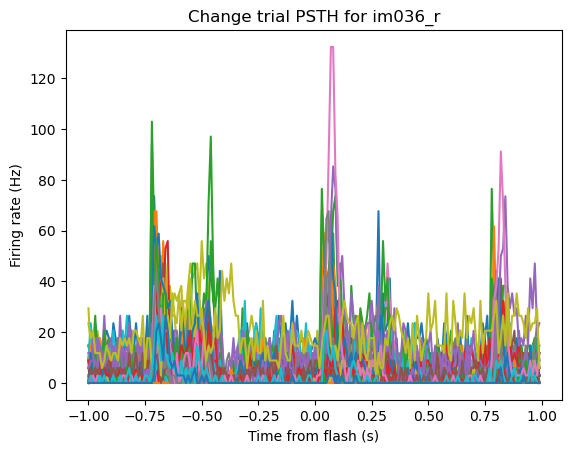

In [36]:
change_start_times = start_times[presentations['is_change'].values.astype('bool')]

psths = []
fig, ax = plt.subplots(1, 1)

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]  
    unit_response, bins = makePSTH(unit_spike_times, 
                                      change_start_times - time_before_im, 
                                      duration, binSize=0.01)
    
    psths.append(unit_response)
    ax.plot(bins[:-1]-time_before_im, unit_response)
    
ax.set_xlabel('Time from flash (s)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('Change trial PSTH for {}'.format(stimulus))

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
Plot the PSTHs for every unit to another image on change trials. Do the same neurons have the strongest responses?

Text(0.5, 1.0, 'PSTH for im111_r')

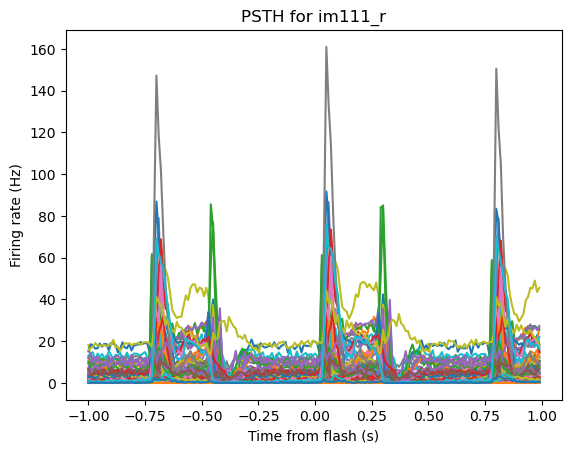

In [43]:
stimulus = stimuli[3]

presentations = stimulus_presentations[stimulus_presentations['image_name'] == stimulus]
start_times = presentations['start_time'].values
change_start_times = start_times[presentations['is_change'].values.astype('bool')]

num_presentations = len(presentations)

start_times = presentations['start_time'].values

fig, ax = plt.subplots(1, 1)

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]  
    unit_response, bins = makePSTH(unit_spike_times, 
                                      start_times - time_before_im, 
                                      duration, binSize=0.01)
    
    psths.append(unit_response)
    ax.plot(bins[:-1]-time_before_im, unit_response)
    
ax.set_xlabel('Time from flash (s)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('PSTH for {}'.format(stimulus))

<div style="background: #E6E6FA; border-radius: 3px; padding: 10px;">
    
## Training a classifier on population spiking data

Now we'll look at how the population activity encodes the image change. To determine how well we can decode the image change from population activity, we will train a **classifier** on a matrix of firing rates. Whereas regression models try to predict continuous values from the input features, classification models try to predict *labels* (also known as classes) from the input features.

### Support Vector Machines

Let's start with a linear Support Vector Machine (SVM) classifier, which will try to draw linear boundaries between orientation conditions (the labels) in our high-dimensional firing rate space.

This cartoon shows how we would expect an SVM to behave on a dataset with two dimensions and three conditions:

![SVM illustration](../../resources/svm-classifier.png)

SVM computes decision boundaries in feature space that can be used to classify different conditions. If a new data point appears, the SVM classifier will label it based on where it falls with respect to these boundaries.

To train an SVM, we need to import the following methods from `scikit-learn`:

In [45]:
from sklearn import svm
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import confusion_matrix

### First, we need to create a response matrix and vector of stimulus labels from the presentations that we'll decode.

In [46]:
print('Total trials: {}'.format(len(stimulus_presentations)))
print('Change trials: {}'.format(np.sum(stimulus_presentations['is_change'].values)))

Total trials: 4797
Change trials: 275


<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The vast majority of stimulus presentations (~95%) are not a change. So a decoder could get 95% accuracy by predicting that there are no changes!

To avoid this, we will balance the trials and decode change vs pre-change.

In [50]:
# add pre-change
stimulus_presentations['pre_change'] = stimulus_presentations['is_change'].shift(-1)

# isolate the trials to use for decoding
decode_trial_ind = (stimulus_presentations['is_change'].values + stimulus_presentations['pre_change'].values)
stimulus_presentations = stimulus_presentations[decode_trial_ind]

In [53]:
### check that the classes are balanced
print(len(stimulus_presentations))
print(np.sum(stimulus_presentations['is_change']))
print(np.sum(stimulus_presentations['pre_change']))

550
275
275


### Now let's make our matrix of responses and vector of labels.

In [54]:
def make_response_array(spike_times, stimulus_presentations, units, window=.05):

    '''
    Create an array of spike counts x stimulus presentations, and a corresponding list of stimulus label
    spike_times: spike times 
    stimulus_presentation: stimulus presentation table
    units: units table containing only the units to get the responses of
    '''

    # sort spike times chronologically; necessary for the binary search later
    sorted_spikes = dict()
    for iu in units.index:
        # mergesort/timsort since most spike_times are already sorted
        sorted_spikes[iu] = np.sort(spike_times[iu], kind='mergesort')

    # create our own copy of stimulus presentations and sort by presentation start time chronologically
    # sortation of stimulus_presentations isn't necessary, but it speeds up the vectorized `searchsorted(...)`
    stimulus_presentations = stimulus_presentations.sort_values(by='start_time', kind='mergesort', inplace=False)

    # Calculate the duration of stimulus presentations, and drop NaN durations
    stimulus_presentations['duration'] = stimulus_presentations['end_time'] - stimulus_presentations['start_time']
    stimulus_presentations.dropna(subset='duration', inplace=True)
    
    # Warn if window size is too big
    if np.any(window > stimulus_presentations['duration']):
        print('Warning: window size longer than stimulus presentation')

    responses_by_unit = list()
    for iu in units.index:
        unit_spike_times = sorted_spikes[iu]

        # Determine the first and last spike time for each stimulus presentation
        start_is = np.searchsorted(unit_spike_times, stimulus_presentations['start_time'])
        end_is = np.searchsorted(unit_spike_times, stimulus_presentations['start_time']+window)

        # presentation_spike_times = unit_spike_times[start_i:end_i]

        # Calculate the response rate for each stimulus presentation
        responses_by_unit.append((end_is - start_is) / stimulus_presentations['duration'])

    # responses_by_unit has each row a unit, and each column a stimulus, flip so that rows are stimuli
    responses = np.transpose(responses_by_unit)

    # Extract the labels that match the responses from our sorted stimulus presentations table
    labels = np.array(stimulus_presentations['is_change']).astype('int')
        
    # Extract the mouse's behavioral response
    hit = np.array(stimulus_presentations['hit']).astype('int')
    miss = np.array(stimulus_presentations['miss']).astype('int')
   
    return responses, labels, hit, miss

In [65]:
responses, labels, hit, miss = make_response_array(spike_times, stimulus_presentations, area_units, window=.06)

### We will first select a random subset of trials for training the classifier:

In [66]:
total_presentations = responses.shape[0]
num_train = int(total_presentations * 0.5) # Use 50% of trials for training
random_trial_order = np.random.permutation(responses.shape[0])
train_indices = random_trial_order[:num_train]

training_data = responses[train_indices]
training_labels = labels[train_indices]

### Next, we'll create the model and fit it to our training data:

In [67]:
clf = svm.SVC()
clf.fit(responses[train_indices], labels[train_indices])

SVC()

### Now that our model has been trained, we can ask it to classify unlabeled data (i.e., the sets of population firing rates that were not included in our original training set):

In [68]:
test_indices = random_trial_order[num_train:]
test_data = responses[test_indices]
predicted_labels = clf.predict(responses[test_indices])

### We can compare the predicted labels to the actual labels in order to assess the classifier's performance. We'll assess accuracy as the fraction of correctly predicted test images. As a baseline, we'll also compute the accuracy of a uniform random prediction.

In [69]:
conditions = np.unique(labels)

actual_labels = labels[test_indices]
accuracy = np.mean(actual_labels == predicted_labels)

print('Accurary: {}'.format(accuracy))
print('Chance level: {}'.format(1/len(conditions)))

Accurary: 0.68
Chance level: 0.5


### We see that we perform better than chance! We can get a better sense of classification performance by using leave-one-out cross-validation. The `scikit-learn.model_selection.LeaveOneOut` iterator will automatically cycle through trials, on each iteration using one trial as a test and the others to train the classifier. Note that the model is fit independently on each iteration.

In [70]:
accuracies = []
confusions = []

conditions = np.unique(labels)
num_splits = 5

for train_indices, test_indices in LeaveOneOut().split(responses):
    
    clf = svm.SVC()
    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)    
#     print(accuracy)
    
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")


mean accuracy: 0.7036363636363636
chance: 0.5


The leave-one-out cross-validation roughly agrees with our previous result. Do we do better on change or pre-change images? To assess this we'll look at the confusion matrix, which tells us how frequently each condition is predicted on change and pre-change presentations.

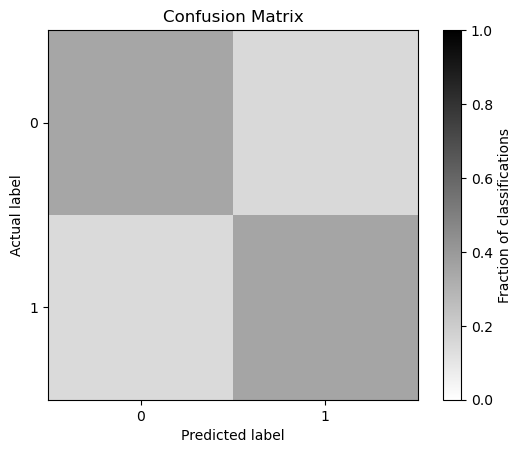

In [72]:
def plot_confusion_matrix(confusions, conditions, title=None):
    
    mean_confusion = np.mean(confusions, axis=0)

    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(mean_confusion, cmap='gray_r', clim=(0, 1))
    plt.colorbar(im, ax=ax, label='Fraction of classifications')
    
    ax.set_xticks(range(len(conditions)), conditions, rotation=0)
    ax.set_yticks(range(len(conditions)), conditions)

    ax.set_xlabel("Predicted label")
    ax.set_ylabel("Actual label")
    if title is None:
        ax.set_title('Confusion Matrix')
    elif type(title) is str:
        ax.set_title(title)
    
plot_confusion_matrix(confusions, conditions)

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
How does this V1-based decoder perform on hit trials vs miss trials?

In [73]:
accuracies = []
accuracies_hit = []
accuracies_miss = []

confusions = []
confusions_hit = []
confusions_miss = []

conditions = np.unique(labels)

for train_indices, test_indices in LeaveOneOut().split(responses):
    
    clf = svm.SVC()
    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)        
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize=None))
    
    test_hit = hit[test_indices].astype('bool')
    test_miss = miss[test_indices].astype('bool')
    
    if hit[test_indices].astype('bool'):
        accuracies_hit.append(accuracy)
        confusions_hit.append(confusion_matrix(y_true=test_targets[test_hit], y_pred=test_predictions[test_hit], labels=conditions, normalize=None))
        
    elif miss[test_indices].astype('bool'):
        accuracies_miss.append(accuracy)
        confusions_miss.append(confusion_matrix(y_true=test_targets[test_miss], y_pred=test_predictions[test_miss], labels=conditions, normalize=None))

print('Mean accuracy: {}'.format(np.mean(accuracies)))
print('Mean accuracy, hit trials: {}'.format(np.mean(accuracies_hit)) )
print('Mean accuracy, miss trials: {}'.format(np.mean(accuracies_miss)) ) 

Mean accuracy: 0.7036363636363636
Mean accuracy, hit trials: 0.7258064516129032
Mean accuracy, miss trials: 0.6181818181818182


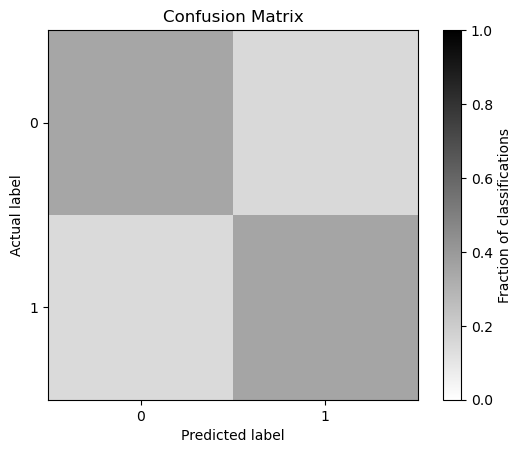

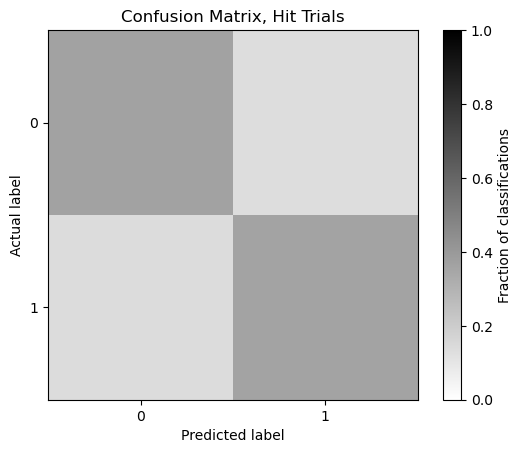

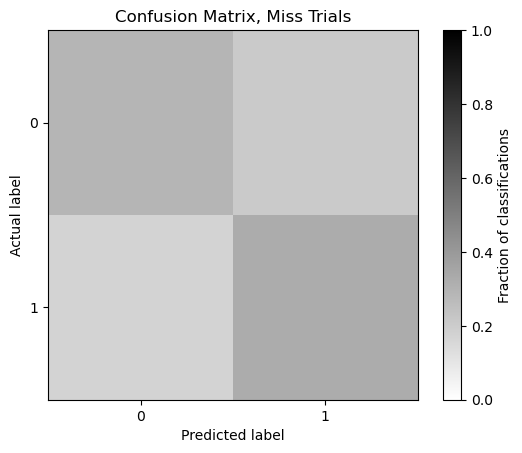

In [74]:
plot_confusion_matrix(confusions, conditions=conditions)
plot_confusion_matrix(confusions_hit, conditions=conditions, title='Confusion Matrix, Hit Trials')
plot_confusion_matrix(confusions_miss, conditions=conditions, title='Confusion Matrix, Miss Trials')

<div style="background: #E6E6FA; border-radius: 3px; padding: 10px;">
    
## Exploring the time course of change-related information 
    
Next we'll examine the time course of information in our population! Or more specifically: how the length of the spike count window affects the decoding accuracy. Can we decode the stimulus perfectly if we integrate spikes for long enough?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
First, let's try decoding with a longer response window.

In [79]:
responses, labels, hit, miss = make_response_array(spike_times, stimulus_presentations, area_units, window=.2)

Mean accuracy: 0.9309090909090909
Mean accuracy, hit trials: 0.8784562211981567
Mean accuracy, miss trials: 0.8022727272727272


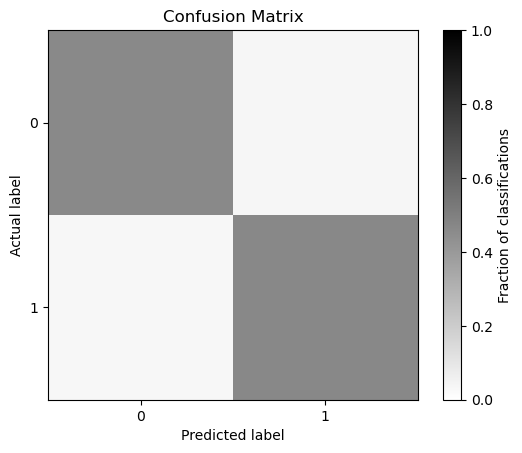

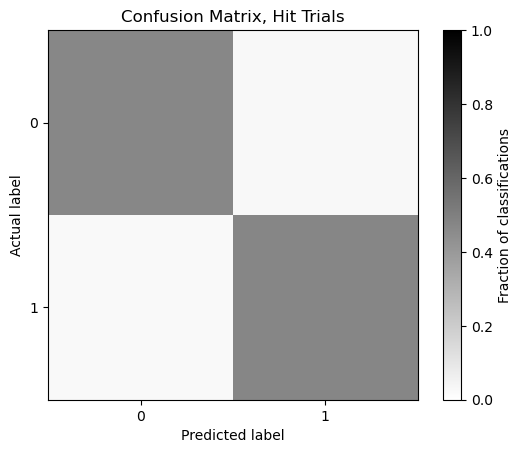

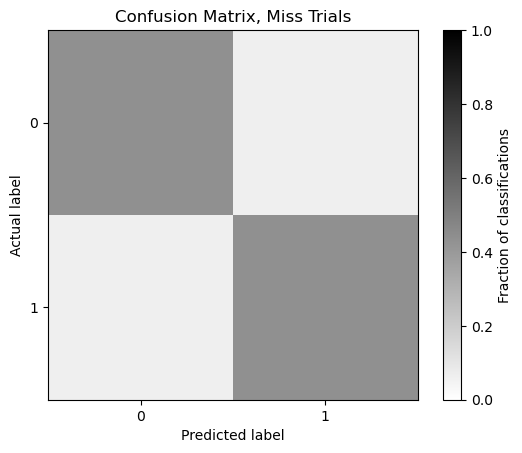

In [80]:
accuracies = []
confusions = []
confusions_hit = []
confusions_miss = []

conditions = np.unique(labels)

for train_indices, test_indices in LeaveOneOut().split(responses):
    
    clf = svm.SVC()
    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)        
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize=None))
    
    test_hit = hit[test_indices].astype('bool')
    test_miss = miss[test_indices].astype('bool')
    
    if hit[test_indices].astype('bool'):
        accuracies_hit.append(accuracy)
        confusions_hit.append(confusion_matrix(y_true=test_targets[test_hit], y_pred=test_predictions[test_hit], labels=conditions, normalize=None))
        
    elif miss[test_indices].astype('bool'):
        accuracies_miss.append(accuracy)
        confusions_miss.append(confusion_matrix(y_true=test_targets[test_miss], y_pred=test_predictions[test_miss], labels=conditions, normalize=None))

print('Mean accuracy: {}'.format(np.mean(accuracies)))
print('Mean accuracy, hit trials: {}'.format(np.mean(accuracies_hit)) )
print('Mean accuracy, miss trials: {}'.format(np.mean(accuracies_miss)) ) 

plot_confusion_matrix(confusions, conditions=conditions)
plot_confusion_matrix(confusions_hit, conditions=conditions, title='Confusion Matrix, Hit Trials')
plot_confusion_matrix(confusions_miss, conditions=conditions, title='Confusion Matrix, Miss Trials')

With a long response window we can discriminate change vs pre-change almost perfectly based on V1 activity!

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
How long do we need to integrate spikes in order to saturate the decoding performance?

In [85]:
window_lengths = np.arange(.01, .2, .01)

Here we'll use a relaxed, K-Fold cross-validation instead of LeaveOneOut for speed purposes. This divides the data set into K pieces, and iterates through them. On each of those K iterations, one piece is used as the "test" set and the others are used to train the decoder.

In [86]:
num_splits = 10
accuracies = np.zeros((len(window_lengths), num_splits))
accuracies_hit = np.zeros((len(window_lengths), num_splits))
accuracies_miss = np.zeros((len(window_lengths), num_splits))

for i, window in enumerate(window_lengths):
    print('{}/{}'.format(i, len(window_lengths)))
    responses, labels, hit, miss = make_response_array(spike_times, stimulus_presentations, area_units, window)
    
    k = 0
    for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
        clf = svm.SVC()
        clf.fit(responses[train_indices], labels[train_indices])

        test_targets = labels[test_indices]
        test_predictions = clf.predict(responses[test_indices])

        accuracies[i, k] = np.mean(test_targets == test_predictions)        
        
        test_hit = hit[test_indices].astype('bool')
        test_miss = miss[test_indices].astype('bool')
        
        accuracies_hit[i, k] = np.mean(test_targets[test_hit] == test_predictions[test_hit])
        accuracies_miss[i, k] = np.mean(test_targets[test_miss] == test_predictions[test_miss])
        
        k += 1

0/19
1/19
2/19
3/19
4/19
5/19
6/19
7/19
8/19
9/19
10/19
11/19
12/19
13/19
14/19
15/19
16/19
17/19
18/19


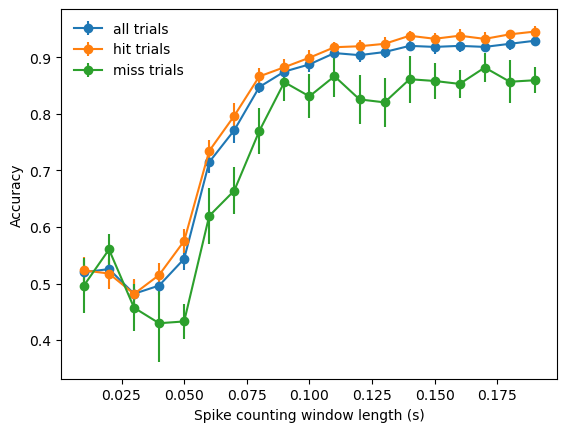

In [87]:
plt.figure()
plt.errorbar(x=window_lengths, y=accuracies.mean(axis=(1)), yerr=accuracies.std(axis=(1))/np.sqrt(num_splits), fmt='o-', label='all trials')
plt.errorbar(x=window_lengths, y=accuracies_hit.mean(axis=(1)), yerr=accuracies_hit.std(axis=(1))/np.sqrt(num_splits), fmt='o-', label='hit trials')
plt.errorbar(x=window_lengths, y=accuracies_miss.mean(axis=(1)), yerr=accuracies_miss.std(axis=(1))/np.sqrt(num_splits), fmt='o-', label='miss trials')

plt.xlabel('Spike counting window length (s)')
plt.ylabel('Accuracy')
plt.legend(loc=0, frameon=False)

<div style="background: #E6E6FA; border-radius: 3px; padding: 10px;">
    
## Relationship between population size and decoding accuracy

Next we'll examine how the size of the simultaneously recorded population affects decoding accuracy. In any physiology experiment, we only have a very small window into the overall population response. For example, there are about 500,000 neurons in mouse V1, so in this case we are measuring around 0.02% of the firing rates in this region.

As the number of simultaneously recorded neurons increases, we expect that our ability to decode stimulus identity will improve. 

To start with, let's try decoding with a random sample of 10 neurons

Mean accuracy: 0.68
Mean accuracy, hit trials: 0.7027649769585254
Mean accuracy, miss trials: 0.6


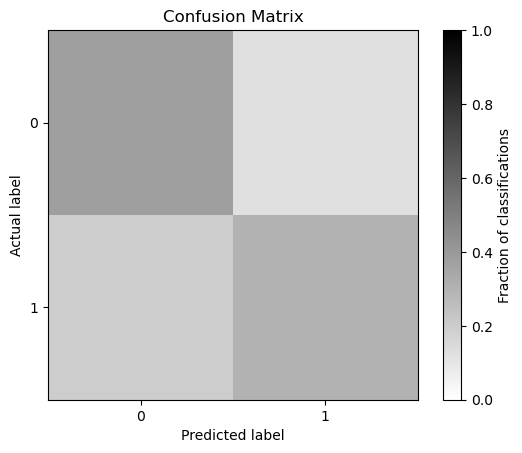

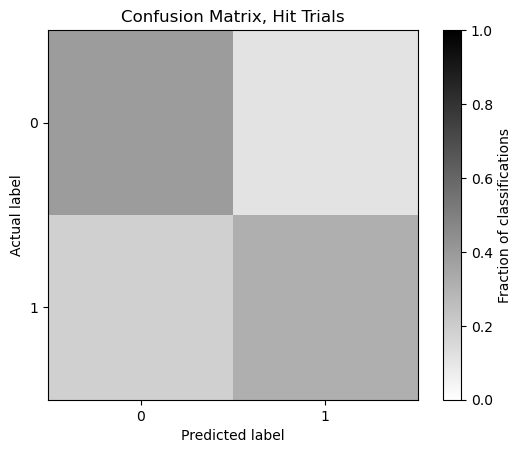

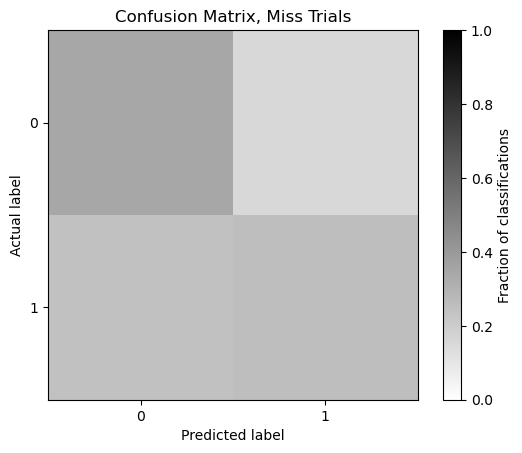

In [88]:
pop_size = 10

pop_idx = np.random.choice(range(num_units), size=pop_size)
responses_pop = responses[:, pop_idx]

accuracies = []
accuracies_hit = []
accuracies_miss = []

confusions = []
confusions_hit = []
confusions_miss = []

conditions = np.unique(labels)

for train_indices, test_indices in LeaveOneOut().split(responses):
    
    clf = svm.SVC()
    clf.fit(responses_pop[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses_pop[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)        
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize=None))
    
    test_hit = hit[test_indices].astype('bool')
    test_miss = miss[test_indices].astype('bool')
    
    if hit[test_indices].astype('bool'):
        accuracies_hit.append(accuracy)
        confusions_hit.append(confusion_matrix(y_true=test_targets[test_hit], y_pred=test_predictions[test_hit], labels=conditions, normalize=None))
        
    elif miss[test_indices].astype('bool'):
        accuracies_miss.append(accuracy)
        confusions_miss.append(confusion_matrix(y_true=test_targets[test_miss], y_pred=test_predictions[test_miss], labels=conditions, normalize=None))

print('Mean accuracy: {}'.format(np.mean(accuracies)))
print('Mean accuracy, hit trials: {}'.format(np.mean(accuracies_hit)) )
print('Mean accuracy, miss trials: {}'.format(np.mean(accuracies_miss)) ) 

        
plot_confusion_matrix(confusions, conditions=conditions)
plot_confusion_matrix(confusions_hit, conditions=conditions, title='Confusion Matrix, Hit Trials')
plot_confusion_matrix(confusions_miss, conditions=conditions, title='Confusion Matrix, Miss Trials')

In [92]:
labels[hit]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
Does the result depend on which 10 neurons we sampled? Let's try another random sample.

Mean accuracy: 0.7545454545454545
Mean accuracy, hit trials: 0.7811059907834101
Mean accuracy, miss trials: 0.6636363636363637


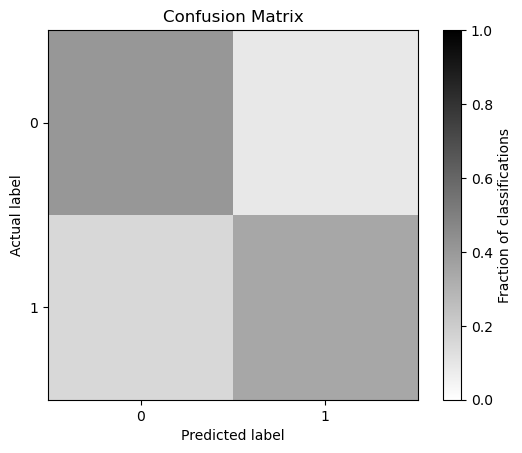

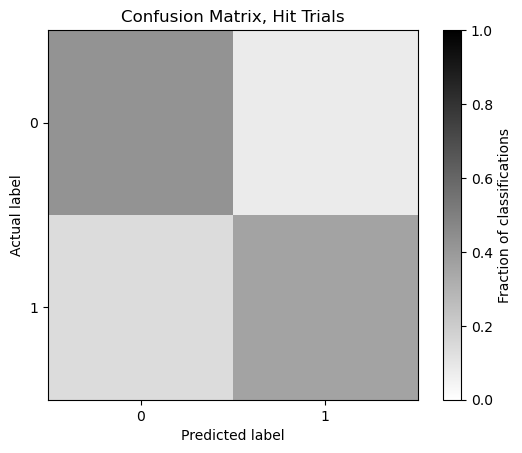

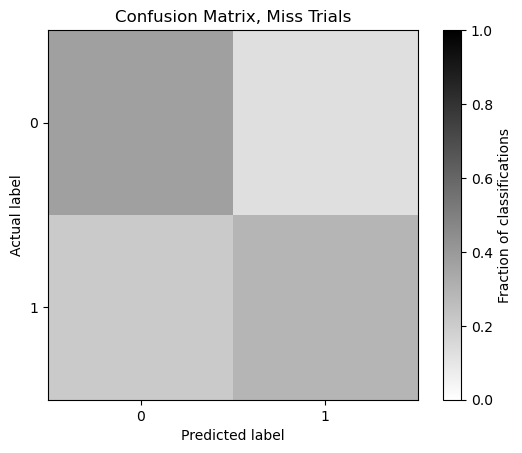

In [93]:
pop_idx = np.random.choice(range(num_units), size=pop_size)
responses_pop = responses[:, pop_idx]

accuracies = []
accuracies_hit = []
accuracies_miss = []

confusions = []
confusions_hit = []
confusions_miss = []

conditions = np.unique(labels)

for train_indices, test_indices in LeaveOneOut().split(responses):
    
    clf = svm.SVC()
    clf.fit(responses_pop[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses_pop[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)        
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize=None))
    
    test_hit = hit[test_indices].astype('bool')
    test_miss = miss[test_indices].astype('bool')
    
    if hit[test_indices].astype('bool'):
        accuracies_hit.append(accuracy)
        confusions_hit.append(confusion_matrix(y_true=test_targets[test_hit], y_pred=test_predictions[test_hit], labels=conditions, normalize=None))
        
    elif miss[test_indices].astype('bool'):
        accuracies_miss.append(accuracy)
        confusions_miss.append(confusion_matrix(y_true=test_targets[test_miss], y_pred=test_predictions[test_miss], labels=conditions, normalize=None))

print('Mean accuracy: {}'.format(np.mean(accuracies)))
print('Mean accuracy, hit trials: {}'.format(np.mean(accuracies_hit)) )
print('Mean accuracy, miss trials: {}'.format(np.mean(accuracies_miss)) ) 

        
plot_confusion_matrix(confusions, conditions=conditions)
plot_confusion_matrix(confusions_hit, conditions=conditions, title='Confusion Matrix, Hit Trials')
plot_confusion_matrix(confusions_miss, conditions=conditions, title='Confusion Matrix, Miss Trials')

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">
    
### Now, let's try to get a sense for how this changes with the number of neurons we use to train the classifier. 
    
### How many neurons do you need to decode with roughly 50% accuracy? 80%? 90%? Finish the code below.

In [94]:
pop_sizes = np.arange(1, num_units+5, 5).astype('int')
num_resamples = 10

accuracies = np.zeros((len(pop_sizes), num_resamples, num_splits))
accuracies_hit = np.zeros((len(pop_sizes), num_resamples, num_splits))
accuracies_miss = np.zeros((len(pop_sizes), num_resamples, num_splits))

for i, pop_size in enumerate(pop_sizes):
    print('population size: {}'.format(pop_size))

    for j in range(num_resamples):
        pop_idx = np.random.choice(range(num_units), size=pop_size)
        responses_pop = responses[:, pop_idx]
            
        k = 0
        for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
            clf = svm.SVC()
            clf.fit(responses_pop[train_indices], labels[train_indices])

            test_targets = labels[test_indices]
            test_predictions = clf.predict(responses_pop[test_indices])

            accuracies[i, j, k] = np.mean(test_targets == test_predictions)        

            test_hit = hit[test_indices].astype('bool')
            test_miss = miss[test_indices].astype('bool')

            accuracies_hit[i, j, k] = np.mean(test_targets[test_hit] == test_predictions[test_hit])
            accuracies_miss[i, j, k] = np.mean(test_targets[test_miss] == test_predictions[test_miss])

            k += 1

population size: 1
population size: 6
population size: 11
population size: 16
population size: 21
population size: 26
population size: 31
population size: 36
population size: 41
population size: 46
population size: 51
population size: 56
population size: 61
population size: 66
population size: 71


Text(0, 0.5, 'Accuracy')

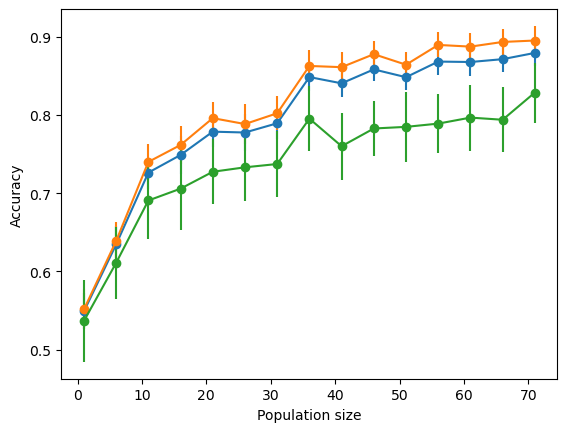

In [97]:
plt.figure()
plt.errorbar(x=pop_sizes, y=accuracies.mean(axis=(1, 2)), yerr=accuracies.std(axis=(1, 2))/np.sqrt(num_splits), fmt='o-')
plt.errorbar(x=pop_sizes, y=accuracies_hit.mean(axis=(1, 2)), yerr=accuracies_hit.std(axis=(1, 2))/np.sqrt(num_splits), fmt='o-')
plt.errorbar(x=pop_sizes, y=accuracies_miss.mean(axis=(1, 2)), yerr=accuracies_miss.std(axis=(1, 2))/np.sqrt(num_splits), fmt='o-')

plt.xlabel('Population size')
plt.ylabel('Accuracy')

Roughly how many neurons do you need to decode with 50% accuracy? 80%? 90%?

# With these analyses in hand, we leave you with some questions:

### If you integrate spikes in a fixed window length, how does the decoding accuracy depend on the time since the image presentation? 

### Where do the lick time distributions fall on the decoding accuracy vs time curve?

### Is the mouse's hit rate different for familiar or novel change images? Is the change decoding accuracy curve different for familiar vs novel change images?


### Are the accuracy curves different in active vs passive blocks?

### Are other variables, including behavioral variables, also encoded in the population activity? Can you decode the running speed, pupil diameter, or licking behavior?

### What about in a different brain area? For example, is the change encoded in CA1 activity? What about in the joint activity across brain areas?